In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [124]:
df = pd.read_csv ('Customer Data.csv')
df.head()

,CustomerID,Gender,Age,Location,Monthly Income (kRs),Spending Score (%),Product line,Payment,Rating
0,1,Male,19,Vasant Kunj,13,39,Health and beauty,Ewallet,9.1
1,2,Male,21,Vasant Kunj,14,81,Electronic accessories,Cash,9.6
2,3,Female,20,Vasant Kunj,14,6,Home and lifestyle,Credit card,7.4
3,4,Female,23,Vasant Kunj,15,77,Health and beauty,Ewallet,8.4
4,5,Female,31,Vasant Kunj,17,40,Sports and travel,Ewallet,5.3


# Converting String Values into Integers

In [125]:
def int_gender(x):
    if x == 'Male':
        return 1
    if x == 'Female':
        return 0
    

def int_location(x):
    if x == 'Vasant Kunj':
        return 0
    if x == 'Safdarjung Enclave':
        return 1
    if x == 'Malviya Nagar':
        return 2

    
def int_Product_line(x):
    if x == 'Health and beauty':
        return 0
    if x == 'Electronic accessories':
        return 1
    if x == 'Home and lifestyle':
        return 2
    if x == 'Sports and travel':
        return 3
    if x == 'Food and beverages':
        return 4
    if x == 'Fashion accessories':
        return 5
    
    
def int_Payment(x):
    if x == 'Ewallet':
        return 0
    if x == 'Cash':
        return 1
    if x == 'Credit card':
        return 2

In [126]:
df['int_Gender'] = df['Gender'].apply(int_gender)
df['int_Loaction'] = df['Location'].apply(int_location)
df['int_Product_Line'] = df['Product line'].apply(int_Product_line)
df['int_Payment'] = df['Payment'].apply(int_Payment)
df.head()

,CustomerID,Gender,Age,Location,Monthly Income (kRs),Spending Score (%),Product line,Payment,Rating,int_Gender,int_Loaction,int_Product_Line,int_Payment
0,1,Male,19,Vasant Kunj,13,39,Health and beauty,Ewallet,9.1,1.0,0,0,0
1,2,Male,21,Vasant Kunj,14,81,Electronic accessories,Cash,9.6,1.0,0,1,1
2,3,Female,20,Vasant Kunj,14,6,Home and lifestyle,Credit card,7.4,0.0,0,2,2
3,4,Female,23,Vasant Kunj,15,77,Health and beauty,Ewallet,8.4,0.0,0,0,0
4,5,Female,31,Vasant Kunj,17,40,Sports and travel,Ewallet,5.3,0.0,0,3,0


In [127]:
df.drop(['CustomerID', 'Gender', 'Location', 'Product line', 'Payment'], axis = 1, inplace= True)
df.head()

,Age,Monthly Income (kRs),Spending Score (%),Rating,int_Gender,int_Loaction,int_Product_Line,int_Payment
0,19,13,39,9.1,1.0,0,0,0
1,21,14,81,9.6,1.0,0,1,1
2,20,14,6,7.4,0.0,0,2,2
3,23,15,77,8.4,0.0,0,0,0
4,31,17,40,5.3,0.0,0,3,0


# Implementation of Feature Selection

In [128]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 10)
var_thres.fit(df)

VarianceThreshold(threshold=10)

In [129]:
var_thres.get_support()

array([ True,  True,  True, False, False, False, False, False])

In [130]:
df.columns[var_thres.get_support()]

Index(['Age', 'Monthly Income (kRs)', 'Spending Score (%)'], dtype='object')

# Implementation of Elbow technique

In [131]:
features = df.iloc[:, [0,1,2]].values
feature = df.iloc[:, [1,2]].values

In [132]:
wcss = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(features)
    wcss.append(km.inertia_)

C:\Users\David Rimo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


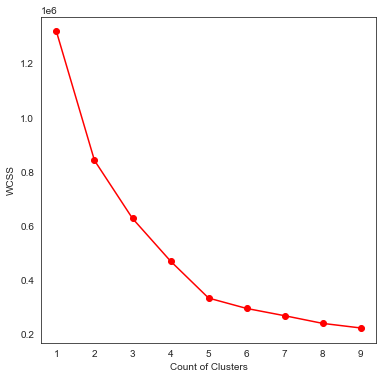

In [133]:
plt.figure(figsize=(6, 6))
plt.plot(range(1, 10), wcss, '-o', c = 'red')
plt.xlabel('Count of Clusters')
plt.ylabel('WCSS');

# Clustering of Age & Monthly Income

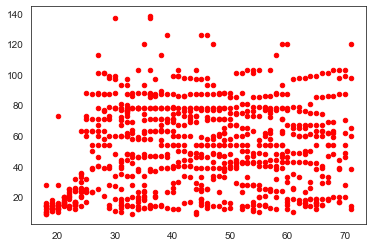

In [134]:
plt.scatter (df['Age'], df['Monthly Income (kRs)'], s=20, c = "red")
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
pred_cluster = kmeans.fit_predict(features)


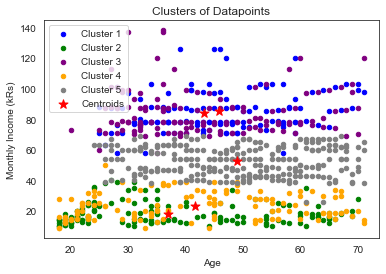

In [135]:
plt.scatter(features[pred_cluster == 0, 0], features[pred_cluster == 0, 1], c = 'blue', s = 20, label = 'Cluster 1')
plt.scatter(features[pred_cluster == 1, 0], features[pred_cluster == 1, 1], c = 'green', s = 20, label = 'Cluster 2')
plt.scatter(features[pred_cluster == 2, 0], features[pred_cluster == 2, 1], c = 'purple', s = 20, label = 'Cluster 3')
plt.scatter(features[pred_cluster == 3, 0], features[pred_cluster == 3, 1], c = 'orange', s = 20, label = 'Cluster 4')
plt.scatter(features[pred_cluster == 4, 0], features[pred_cluster == 4, 1], c = 'gray', s = 20, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '*', c = 'red', s = 90, label = 'Centroids')
plt.title('Clusters of Datapoints')
plt.xlabel('Age')
plt.ylabel('Monthly Income (kRs)')
plt.legend()
plt.show()

# Clustering of Age & Spending Score

In [136]:
df.head()

,Age,Monthly Income (kRs),Spending Score (%),Rating,int_Gender,int_Loaction,int_Product_Line,int_Payment
0,19,13,39,9.1,1.0,0,0,0
1,21,14,81,9.6,1.0,0,1,1
2,20,14,6,7.4,0.0,0,2,2
3,23,15,77,8.4,0.0,0,0,0
4,31,17,40,5.3,0.0,0,3,0


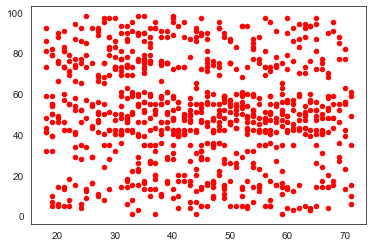

In [137]:
plt.scatter (df['Age'], df['Spending Score (%)'], s=20, c = "red")
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
pred_cluster = kmeans.fit_predict(features)

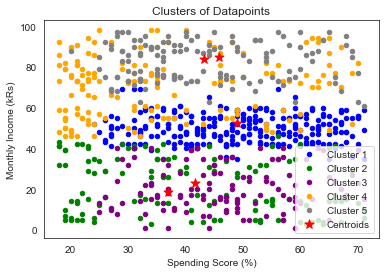

In [138]:
plt.scatter(features[pred_cluster == 0, 0], features[pred_cluster == 0, 2], c = 'blue', s = 20, label = 'Cluster 1')
plt.scatter(features[pred_cluster == 1, 0], features[pred_cluster == 1, 2], c = 'green', s = 20, label = 'Cluster 2')
plt.scatter(features[pred_cluster == 2, 0], features[pred_cluster == 2, 2], c = 'purple', s = 20, label = 'Cluster 3')
plt.scatter(features[pred_cluster == 3, 0], features[pred_cluster == 3, 2], c = 'orange', s = 20, label = 'Cluster 4')
plt.scatter(features[pred_cluster == 4, 0], features[pred_cluster == 4, 2], c = 'gray', s = 20, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '*', c = 'red', s = 90, label = 'Centroids')
plt.title('Clusters of Datapoints')
plt.ylabel('Monthly Income (kRs)')
plt.xlabel('Spending Score (%)')
plt.legend()
plt.show()

# Clustering of Monthly Income & Spending Score

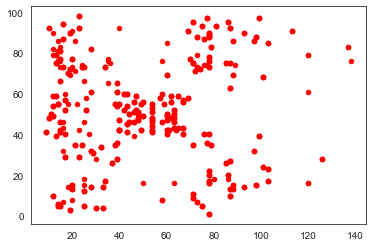

In [139]:
plt.scatter (df['Monthly Income (kRs)'], df['Spending Score (%)'], s=20, c = "red")
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
pred_cluster = kmeans.fit_predict(features)

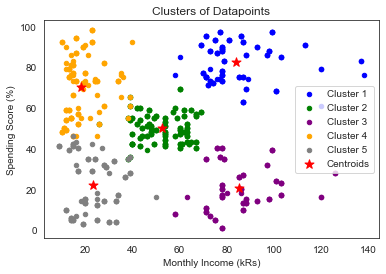

In [140]:
plt.scatter(features[pred_cluster == 0, 1], features[pred_cluster == 0, 2], c = 'blue', s = 20, label = 'Cluster 1')
plt.scatter(features[pred_cluster == 1, 1], features[pred_cluster == 1, 2], c = 'green', s = 20, label = 'Cluster 2')
plt.scatter(features[pred_cluster == 2, 1], features[pred_cluster == 2, 2], c = 'purple', s = 20, label = 'Cluster 3')
plt.scatter(features[pred_cluster == 3, 1], features[pred_cluster == 3, 2], c = 'orange', s = 20, label = 'Cluster 4')
plt.scatter(features[pred_cluster == 4, 1], features[pred_cluster == 4, 2], c = 'gray', s = 20, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker = '*', c = 'red', s = 90, label = 'Centroids')
plt.title('Clusters of Datapoints')
plt.xlabel('Monthly Income (kRs)')
plt.ylabel('Spending Score (%)')
plt.legend()
plt.show()

In [141]:
distances = kmeans.fit_transform(feature)
distances = np.sqrt(distances)
mean_distance = np.mean(distances)
print(mean_distance)

6.634391857019545


# 3D Models

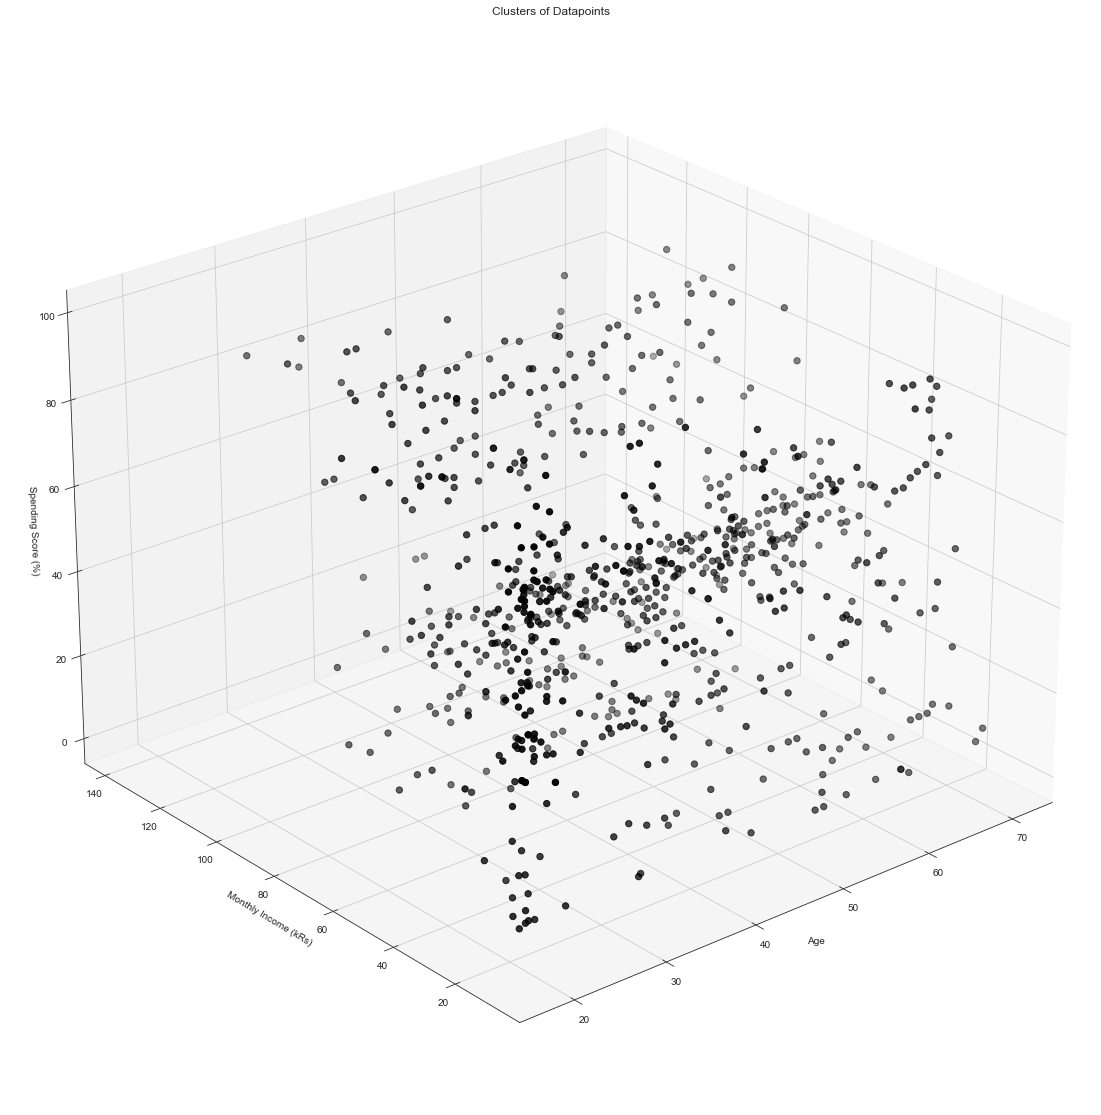

In [142]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"], df["Monthly Income (kRs)"], df["Spending Score (%)"], c='black', s=40)
ax.view_init(25, 230)
plt.title('Clusters of Datapoints')
plt.xlabel("Age")
plt.ylabel("Monthly Income (kRs)")
ax.set_zlabel('Spending Score (%)')
plt.show()

In [143]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:, [0, 1, 2]])

df["label"] = clusters

IndexError: index 2 is out of bounds for axis 1 with size 2

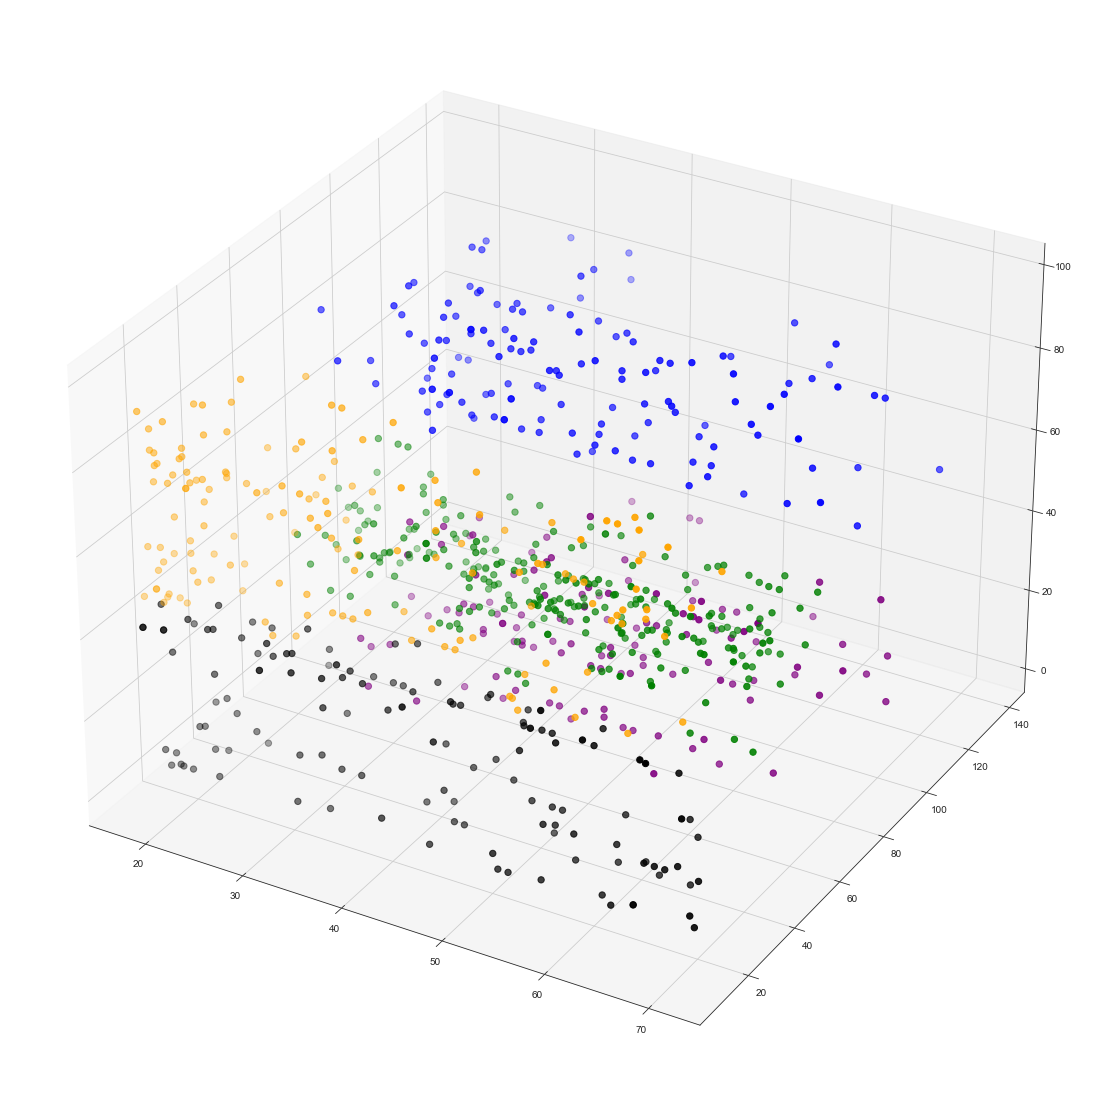

In [144]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features[pred_cluster == 0, 0], features[pred_cluster == 0, 1], features[pred_cluster == 0, 2], c = 'blue', s = 40, label = 'Cluster 1')
ax.scatter(features[pred_cluster == 1, 0], features[pred_cluster == 1, 1], features[pred_cluster == 1, 2], c = 'green', s = 40, label = 'Cluster 2')
ax.scatter(features[pred_cluster == 2, 0], features[pred_cluster == 2, 1], features[pred_cluster == 2, 2], c = 'purple', s = 40, label = 'Cluster 3')
ax.scatter(features[pred_cluster == 3, 0], features[pred_cluster == 3, 1], features[pred_cluster == 3, 2], c = 'orange', s = 40, label = 'Cluster 4')
ax.scatter(features[pred_cluster == 4, 0], features[pred_cluster == 4, 1], features[pred_cluster == 4, 2], c = 'black', s = 40, label = 'Cluster 5')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='*', s=300, label='centroid')

ax.view_init(25, 240)
plt.title('Clusters of Datapoints')
ax.set_xlabel("Age")
ax.set_ylabel("Monthly Income (kRs)")
ax.set_zlabel('Spending Score (%)')
plt.show()
